In [6]:
'''from hyperparameter_tuning import optimize
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.easy_test()

chi = [32]
opts_maxit = [2,3,4]
opts_krydim = [2,4,6,8]
numsweeps = [10,50,100]
penalties = [0.3,0.6,1,5,10,50,100,500]
normalization = [False, True]

best_combo = optimize(W_capacity, weights, values, chi, opts_maxit, opts_krydim, numsweeps, penalties, normalization)'''

'from hyperparameter_tuning import optimize\nimport tests.custom_tests as tests\n\nN, values, weights, W_capacity = tests.easy_test()\n\nchi = [32]\nopts_maxit = [2,3,4]\nopts_krydim = [2,4,6,8]\nnumsweeps = [10,50,100]\npenalties = [0.3,0.6,1,5,10,50,100,500]\nnormalization = [False, True]\n\nbest_combo = optimize(W_capacity, weights, values, chi, opts_maxit, opts_krydim, numsweeps, penalties, normalization)'

In [7]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.random_test(10)

from dmrg_solver import DMRG_solver

chi = 32
opts_maxit = 2
opts_krydim = 4
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi, opts_maxit, opts_krydim)

penalty = 100
numsweeps = 100
qkp_DMRG.show_run_plots = False
error = qkp_DMRG.annealing_run(penalty, step=10, numsweeps = numsweeps, normalization=False)
print('Final error: ', error)

EEEEEEEEY 1048575.9202779676
EEEEEEEEY -1634272.9358106232
EEEEEEEEY 1446167.7384948242
EEEEEEEEY 1053489.7809459856
EEEEEEEEY -633297.9102655698
EEEEEEEEY 289933.21670934785
EEEEEEEEY 86903.93786014029
EEEEEEEEY 13698.718969449072
EEEEEEEEY -829.9363899052732
EEEEEEEEY -7.137384189424699
EEEEEEEEY -1.2095520118387367e-10
Final error:  (1.4510154525575388e-23+0j)


[0.19999999999999907, 0.17613493903660604, 0.15215536399994323, 0.1251513585641142, 0.09623833198871456, 0.06732832839435021, 0.04182320294962949, 0.02307687585122209, 0.012002320394692179, 0.007993342948616089, 0.008190366670678184]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


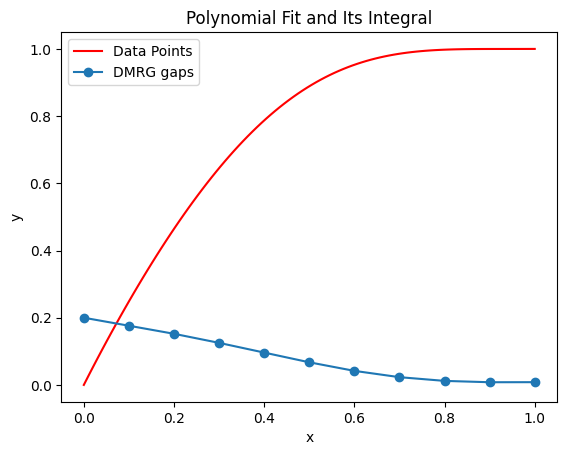

In [8]:
import numpy as np
import matplotlib.pyplot as plt

print(qkp_DMRG.dmrg_gaps)
s = qkp_DMRG.annealing_time_estimation()

# Create a sequence of 100 points for plotting the fitted polynomial and its integral
x = np.linspace(0, 1, num = 100)
y = s(x)
# Plot the data points, fitted polynomial, and its integral
plt.plot(x, y, color='red', label='Data Points')

x_gaps = [(s / (len(qkp_DMRG.dmrg_gaps)-1)) for s in range(len(qkp_DMRG.dmrg_gaps))]
print(x_gaps)
plt.plot(x_gaps, qkp_DMRG.dmrg_gaps, label='DMRG gaps', marker='o')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit and Its Integral')
plt.show()

0.9375 + 8.01041667 x + 14.58333333 x**2 - 13.02083333 x**3 -
13.02083333 x**4 + 6.51041667 x**5
Polynomial coefficients (low to high order): [  0.9375       8.01041667  14.58333333 -13.02083333 -13.02083333
   6.51041667]
0.0 + 2.34375 x + 10.01302083 x**2 + 12.15277778 x**3 - 8.13802083 x**4 -
6.51041667 x**5 + 2.71267361 x**6
Integrated polynomial coefficients (low to high order): [ 0.          2.34375    10.01302083 12.15277778 -8.13802083 -6.51041667
  2.71267361]


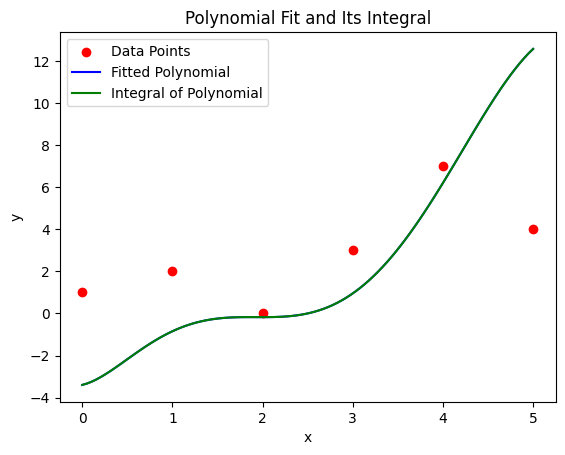

In [9]:
# Execute the provided code to fit the polynomial and find its integral

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Sample data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 2, 0, 3, 7, 4])

# Fit a polynomial of degree 5
p = Polynomial.fit(x, y, 5)
print(p)

# Print the polynomial coefficients
print("Polynomial coefficients (low to high order):", p.coef)

# Integrate the polynomial
p_integ = p.integ()
print(p_integ)

# Print the integrated polynomial coefficients
print("Integrated polynomial coefficients (low to high order):", p_integ.coef)

# Create a sequence of 100 points for plotting the fitted polynomial and its integral
x_fit = np.linspace(0, 5, 100)
y_fit = p_integ(x_fit)
y_integ = p_integ(x_fit)

# Plot the data points, fitted polynomial, and its integral
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_fit, y_fit, color='blue', label='Fitted Polynomial')
plt.plot(x_fit, y_integ, color='green', label='Integral of Polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit and Its Integral')
plt.show()


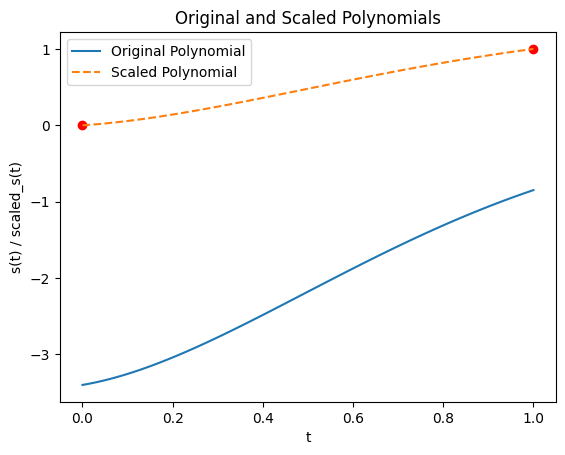

scaled_polynomial(0) = 0.0
scaled_polynomial(1) = 1.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial


# Evaluate the polynomial at the endpoints
s_0 = p_integ(0)
s_1 = p_integ(1)

# Define the scaled polynomial
def scaled_polynomial(t):
    return (p_integ(t) - s_0) / (s_1 - s_0)

# Create a sequence of points for plotting
t_fit = np.linspace(0, 1, 100)
y_fit = p_integ(t_fit)
y_scaled_fit = scaled_polynomial(t_fit)

# Plot the original polynomial and the scaled polynomial
plt.plot(t_fit, y_fit, label='Original Polynomial')
plt.plot(t_fit, y_scaled_fit, label='Scaled Polynomial', linestyle='--')
plt.scatter([0, 1], [scaled_polynomial(0), scaled_polynomial(1)], color='red')  # Points at t=0 and t=1
plt.legend()
plt.xlabel('t')
plt.ylabel('s(t) / scaled_s(t)')
plt.title('Original and Scaled Polynomials')
plt.show()

# Verify the scaled polynomial at the endpoints
print("scaled_polynomial(0) =", scaled_polynomial(0))  # Should print 0
print("scaled_polynomial(1) =", scaled_polynomial(1))  # Should print 1
